# Exploratory Data Analysis (Clean Data)

**Purpose:** EDA post-cleaning to finalize understanding

### 🔁 What to repeat or add:

- N-gram analysis (class-specific)

- TF-IDF scores distribution

- Visualize common class-specific terms

- Re-check stopword usage if kept

- Word clouds per category (clean version)

- Class similarity (optional: cosine similarity)

✅ **Output:** Insight into how clean data behaves — useful for modeling decisions (e.g., bag-of-words vs TF-IDF vs transformer embeddings)

In [24]:
import pandas as pd
import numpy as np
import os

## Load the Dataset

In [25]:
DATA_PATH = os.path.join(os.getcwd(), "data")
# print(DATA_PATH)

In [26]:
train_df = pd.read_csv(os.path.join(DATA_PATH, "train_data_cleaned.csv"))
train_df.head()

,ArticleId,Text,Category,Clean_text,Label
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defend f...,0
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...,1
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...,0


In [27]:
test_df = pd.read_csv(os.path.join(DATA_PATH, "test_data_cleaned.csv"))
test_df.head()

,ArticleId,Text,Clean_text
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day head preston queen park ranger ...
1,1319,software watching while you work software that...,software watch work software monitor every key...
2,1138,d arcy injury adds to ireland woe gordon d arc...,arcy injury add ireland woe gordon arcy rule i...
3,459,india s reliance family feud heats up the ongo...,india reliance family feud heat ongoing public...
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injury blow middlesbrough...


## Data Columns

The "Text" column contains the textual information(input features) and the "Category" column contains the output labels. The task of any classifier is to correctly predict the "Category" given any "Text" or textual column. Hence we have to apply our data cleaning, transformation steps to the "Text" column.

## Validating the number of entries

This includes the number of entries we have in the dataset. Also we can have an analysis on the statistical aspects of the data which we will be exploring further through graphs and charts.

In [28]:
len(train_df), train_df.index.shape[-1]

(1490, 1490)

In [29]:
len(test_df), test_df.index.shape[-1]

(735, 735)

## Analysisng Text Data

In [30]:
# for processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# for eavluation
from sklearn import preprocessing, metrics, manifold
# for features
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
# to handle imbalance cxategories
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import NearMiss

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# visualization
import collections
from collections import Counter, defaultdict
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline

from sklearn.preprocessing import RobustScaler
import xgboost
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

# Download stopwords (only need to do this once)
nltk.download('stopwords')
import re
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulshelke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
## Assess the shape of the data
print("The Shape of the Dataset".format(), train_df.shape)

The Shape of the Dataset (1490, 5)


In [32]:
train_df["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

## Statistical Analysis-I

This is the start of the analysis phase where we will first check the amount of data present in either of the categories. 
We will follow this up with some pictorial representations related to the words and frequency mappings.


In [15]:
bussiness = train_df[train_df["Category"]=="business"]["Clean_text"]
tech = train_df[train_df["Category"]=="tech"]["Text"]
politics = train_df[train_df["Category"]=="politics"]["Clean_text"]
sport = train_df[train_df["Category"]=="sport"]["Clean_text"]
entertainment = train_df[train_df["Category"]=="entertainment"]["Clean_text"]

print("First 10 samples of businees relates news samples\n".format(), bussiness[:10])
print()
print("First 10 samples of tech relates news samples\n".format(), tech[:10])
print()
print("First 10 samples of politics relates news samples\n".format(), politics[:10])
print()
print("First 10 samples of sport relates news samples\n".format(), sport[:10])
print()
print("First 10 samples of entertainment relates news samples\n".format(), entertainment[:10])

First 10 samples of businees relates news samples
 0     worldcom ex bos launch defence lawyer defend f...
1     german business confidence slide german busine...
2     bbc poll indicate economic gloom citizen major...
4     enron boss payout eighteen former enron direct...
8     car giant hit mercedes slump slump profitabili...
12    uk coal plunge deeper loss share uk coal fall ...
13    bp surge ahead high oil price oil giant bp ann...
25    china role yukos split china lent russia help ...
29    iran budget seek state sell offs iran presiden...
32    china continue rapid growth china economy expa...
Name: Clean_text, dtype: object

First 10 samples of tech relates news samples
 3     lifestyle  governs mobile choice  faster  bett...
19    moving mobile improves golf swing a mobile pho...
24    bt boosts its broadband packages british telec...
26    peer-to-peer nets  here to stay  peer-to-peer ...
30    pompeii gets digital make-over the old-fashion...
39    security scares spark b

In [16]:
# Count of all categories text
count = train_df["Category"].value_counts()
print("Total Counts of all sets".format(), count)

Total Counts of all sets Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


In [17]:
for label, count in enumerate(dict(count)):
    print(label, count,)

0 sport
1 business
2 politics
3 entertainment
4 tech


In [18]:
dict(train_df["Category"].value_counts(ascending=False)).keys()

dict_keys(['sport', 'business', 'politics', 'entertainment', 'tech'])

## Category Wise Count

<Axes: xlabel='count', ylabel='Category'>

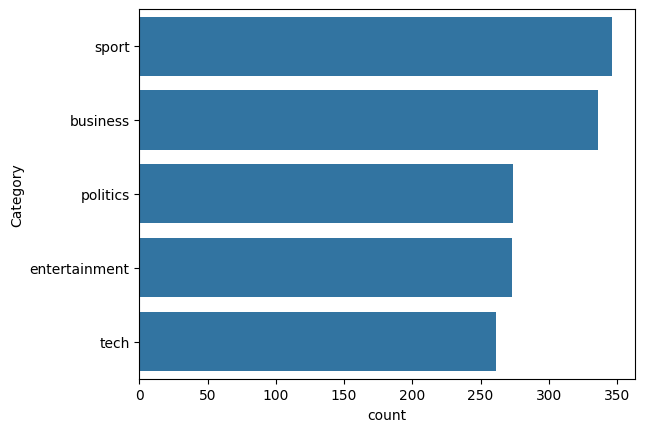

In [19]:
sns.countplot(train_df, y='Category', order=dict(train_df["Category"].value_counts(ascending=False)).keys())

## # of tokens distribution per category

In [41]:
train_df[['Token_length_raw','Token_length_cleaned']].describe()

,Token_length_raw,Token_length_cleaned
count,1490.000000,1490.000000
mean,385.012752,215.690604
std,210.898616,113.602793
min,90.000000,48.000000
25%,253.000000,141.000000
50%,337.000000,190.000000
75%,468.750000,264.000000
max,3345.000000,1648.000000


In [ ]:
# Step 1: Compute token lengths
train_df['Token_length_raw'] = train_df["Text"].astype(str).apply(lambda x: len(x.split()))
train_df['Token_length_cleaned'] = train_df["Clean_text"].astype(str).apply(lambda x: len(x.split()))

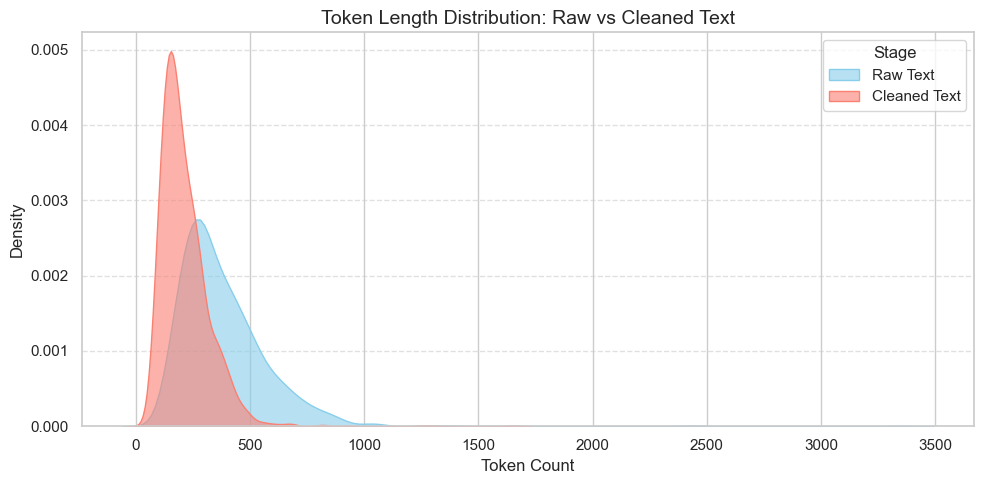

In [39]:
plt.figure(figsize=(10, 5))

# KDE plots
sns.kdeplot(train_df['Token_length_raw'], fill=True, label='Raw Text', color='skyblue', alpha=0.6)
sns.kdeplot(train_df['Token_length_cleaned'], fill=True, label='Cleaned Text', color='salmon', alpha=0.6)

# Titles and labels
plt.title("Token Length Distribution: Raw vs Cleaned Text", fontsize=14)
plt.xlabel("Token Count")
plt.ylabel("Density")
plt.legend(title="Stage")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- more than 75% of raw text had tokens distribution ~500 tokens
- after cleaning it goen to half which is ~250 tokens

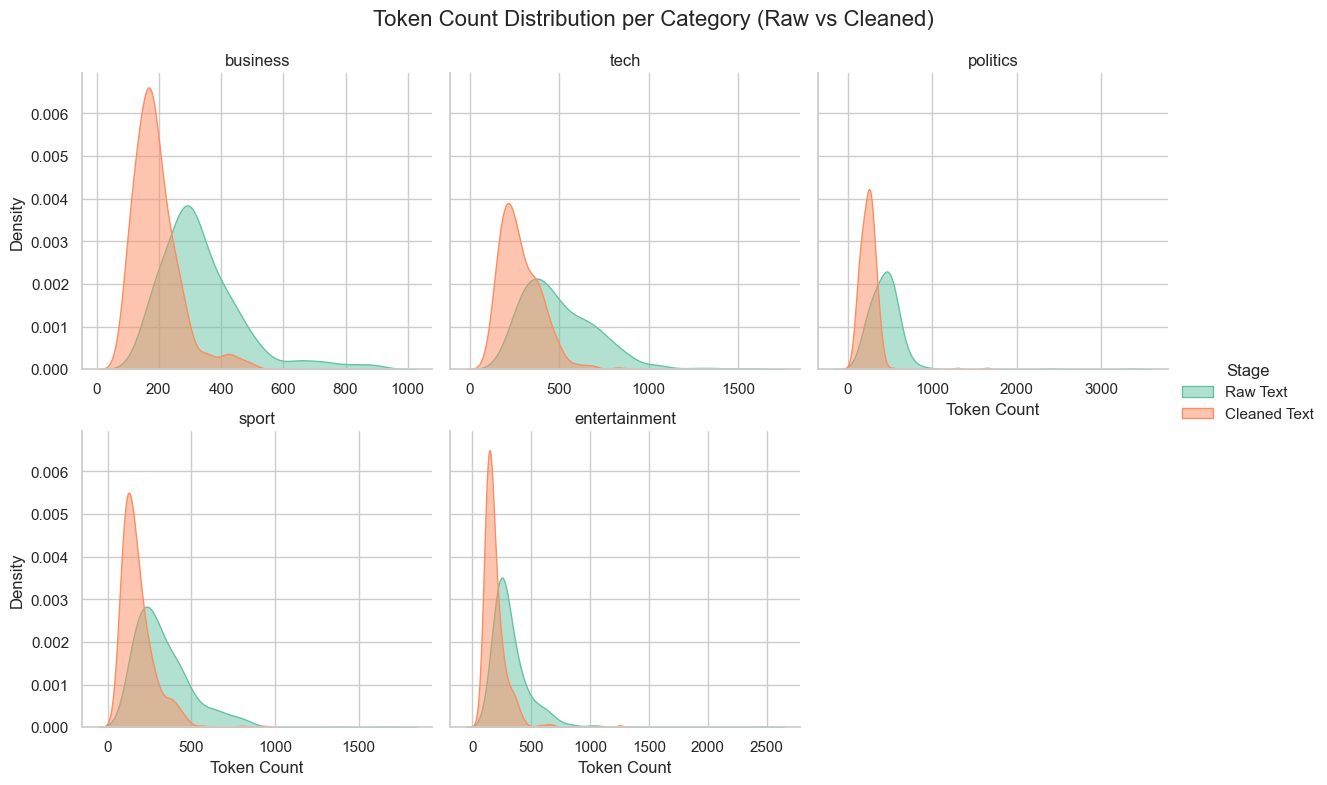

In [ ]:
# Step 2: Melt to long format
token_lengths = train_df.melt(
    id_vars=["Category"],
    value_vars=["Token_length_raw", "Token_length_cleaned"],
    var_name="Stage",
    value_name="Token_Count"
)

# Rename stages
token_lengths["Stage"] = token_lengths["Stage"].map({
    "Token_length_raw": "Raw Text",
    "Token_length_cleaned": "Cleaned Text"
})

# ✅ Step 3: Correct FacetGrid usage with hue mapped at grid level
g = sns.FacetGrid(
    token_lengths,
    col="Category",
    hue="Stage",         # <-- hue at the grid level
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=True,
    palette="Set2"
)

g.map(sns.kdeplot, "Token_Count", fill=True, alpha=0.5)

# ✅ Add a single shared legend
g.add_legend(title="Stage")

# Labels and layout
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Token Count", "Density")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Token Count Distribution per Category (Raw vs Cleaned)", fontsize=16)
plt.show()


## ECDF plot comparing before and after cleaning token lengths

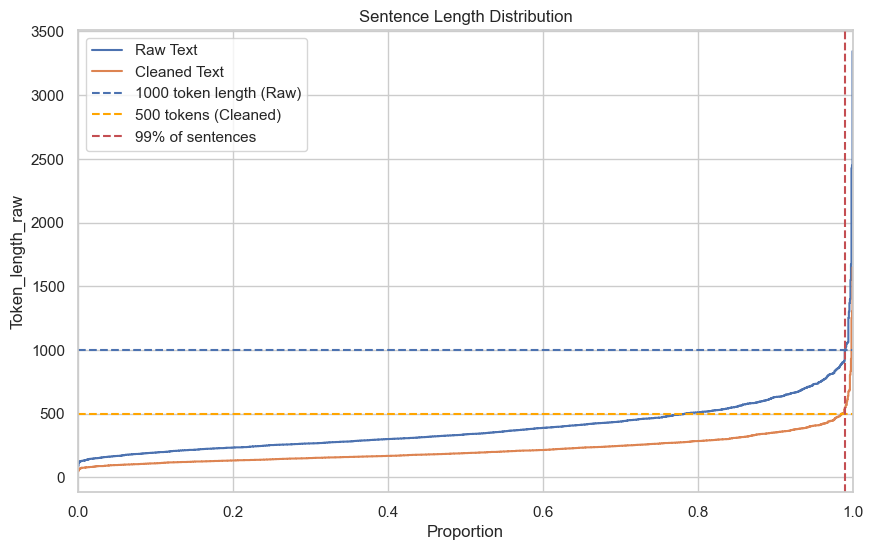

In [49]:
plt.figure(figsize=(10, 6))

sns.ecdfplot(data=train_df, y="Token_length_raw", label='Raw Text')
sns.ecdfplot(data=train_df, y="Token_length_cleaned", label='Cleaned Text')
plt.axhline(y=1000, color='b', linestyle='--', label="1000 token length (Raw)")
plt.axhline(y=500, color='orange', linestyle='--', label="500 tokens (Cleaned)")
plt.axvline(x=0.99, color='r', linestyle='--', label="99% of sentences")

plt.title("Sentence Length Distribution")
plt.legend()
plt.show()

- this confirms the outliers, will discard those, as they are 1% of the data

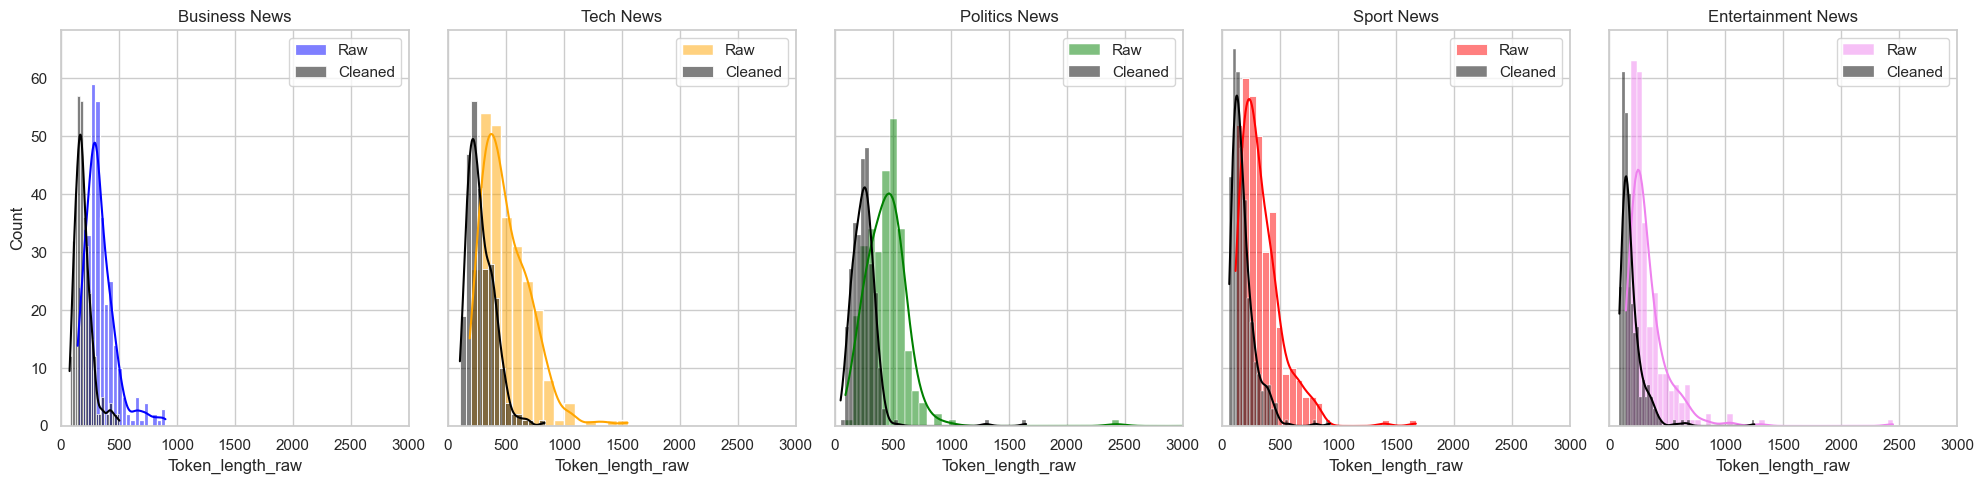

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

categories = ['business', 'tech', 'politics', 'sport', 'entertainment']
colors = ['blue', 'orange', 'green', 'red', 'violet']

for ax, category, color in zip(axes, categories, colors):
    df_cat = train_df[train_df['Category'] == category]
    
    # Raw token length
    sns.histplot(data=df_cat, x='Token_length_raw', kde=True, color=color, label='Raw', ax=ax, alpha=0.5)
    
    # Cleaned token length
    sns.histplot(data=df_cat, x='Token_length_cleaned', kde=True, color='black', label='Cleaned', ax=ax, alpha=0.5)
    
    ax.set_xlim(0, 3000)
    ax.set_title(f"{category.capitalize()} News")
    ax.legend()

plt.tight_layout()
plt.show()

## Punctuation count distribution

In [52]:
# Count Punctuations/Stopwords/Codes and other semantic datatypes

train_df["Count_punctuations_raw"] = train_df["Text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
train_df["Count_punctuations_cleaned"] = train_df["Clean_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [53]:
train_df[["Count_punctuations_raw", "Count_punctuations_cleaned"]].describe()

,Count_punctuations_raw,Count_punctuations_cleaned
count,1490.000000,1490.0
mean,29.830201,0.0
std,18.448157,0.0
min,6.000000,0.0
25%,19.000000,0.0
50%,26.000000,0.0
75%,36.000000,0.0
max,216.000000,0.0


- there are no punctuations

## Stop word count distribution

In [54]:
# Analyse Stopwords

stops = set(STOPWORDS)

train_df["Stop_words_raw"] = train_df["Text"].apply(lambda z: len([w for w in str(z).split() if w in stops]))
train_df["Stop_words_cleaned"] = train_df["Clean_text"].apply(lambda z: len([w for w in str(z).split() if w in stops]))

test_df["Stop_words_raw"] = test_df["Text"].apply(lambda z: len([w for w in str(z).split() if w in stops]))
test_df["Stop_words_cleaned"] = test_df["Clean_text"].apply(lambda z: len([w for w in str(z).split() if w in stops]))

In [82]:
print('='*10, "Train Data", '='*10)
print(f"Total Stop Words (Raw): {train_df['Stop_words_raw'].sum()}")
print(f"Total Stop Words (Cleaned): {np.round(train_df['Stop_words_cleaned'].sum()/train_df['Stop_words_raw'].sum()*100, 2) }")

print('='*10, "Test Data", '='*10)
print(f"Total Stop Words (Raw): {test_df['Stop_words_raw'].sum()}")
print(f"Total Stop Words (Cleaned): {np.round(test_df['Stop_words_cleaned'].sum()/test_df['Stop_words_raw'].sum()*100, 2)}")

========== Train Data ==========
Total Stop Words (Raw): 235572
Total Stop Words (Cleaned): 3.13
========== Test Data ==========
Total Stop Words (Raw): 122006
Total Stop Words (Cleaned): 3.21


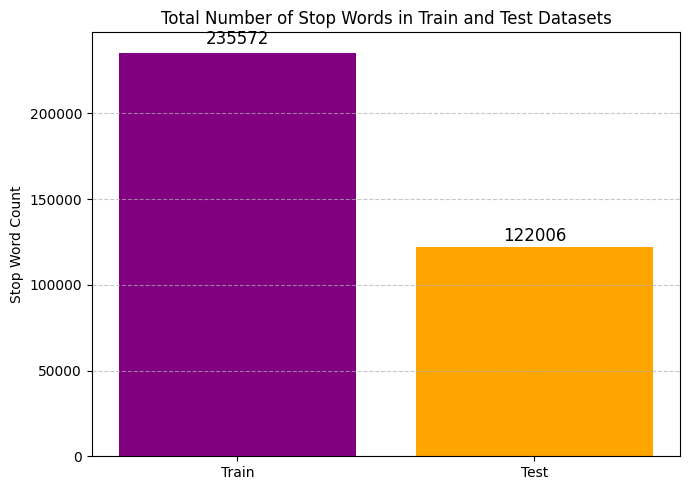

In [46]:
# Total stopword count in each dataset
total_stopwords_train = train_df["Stop_words"].sum()
total_stopwords_test = test_df["Stop_words"].sum()

# Plotting
plt.figure(figsize=(7, 5))
bars = plt.bar(['Train', 'Test'], [total_stopwords_train, total_stopwords_test], color=['purple', 'orange'])
plt.title("Total Number of Stop Words in Train and Test Datasets")
plt.ylabel("Stop Word Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01, f'{int(height)}', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

In [67]:
stopword_summary = train_df.groupby('Category')[['Stop_words_raw', 'Stop_words_cleaned']].sum().round(2)
stopword_summary = stopword_summary.rename(columns={
    'Stop_words_raw': 'Stopwords (Raw)',
    'Stop_words_cleaned': 'Stopwords (Cleaned)'
})
stopword_summary

,Stopwords (Raw),Stopwords (Cleaned)
Category,,
business,43400,1295
entertainment,35661,966
politics,52584,1871
sport,48807,1422
tech,55120,1809


### WordClound Visualization

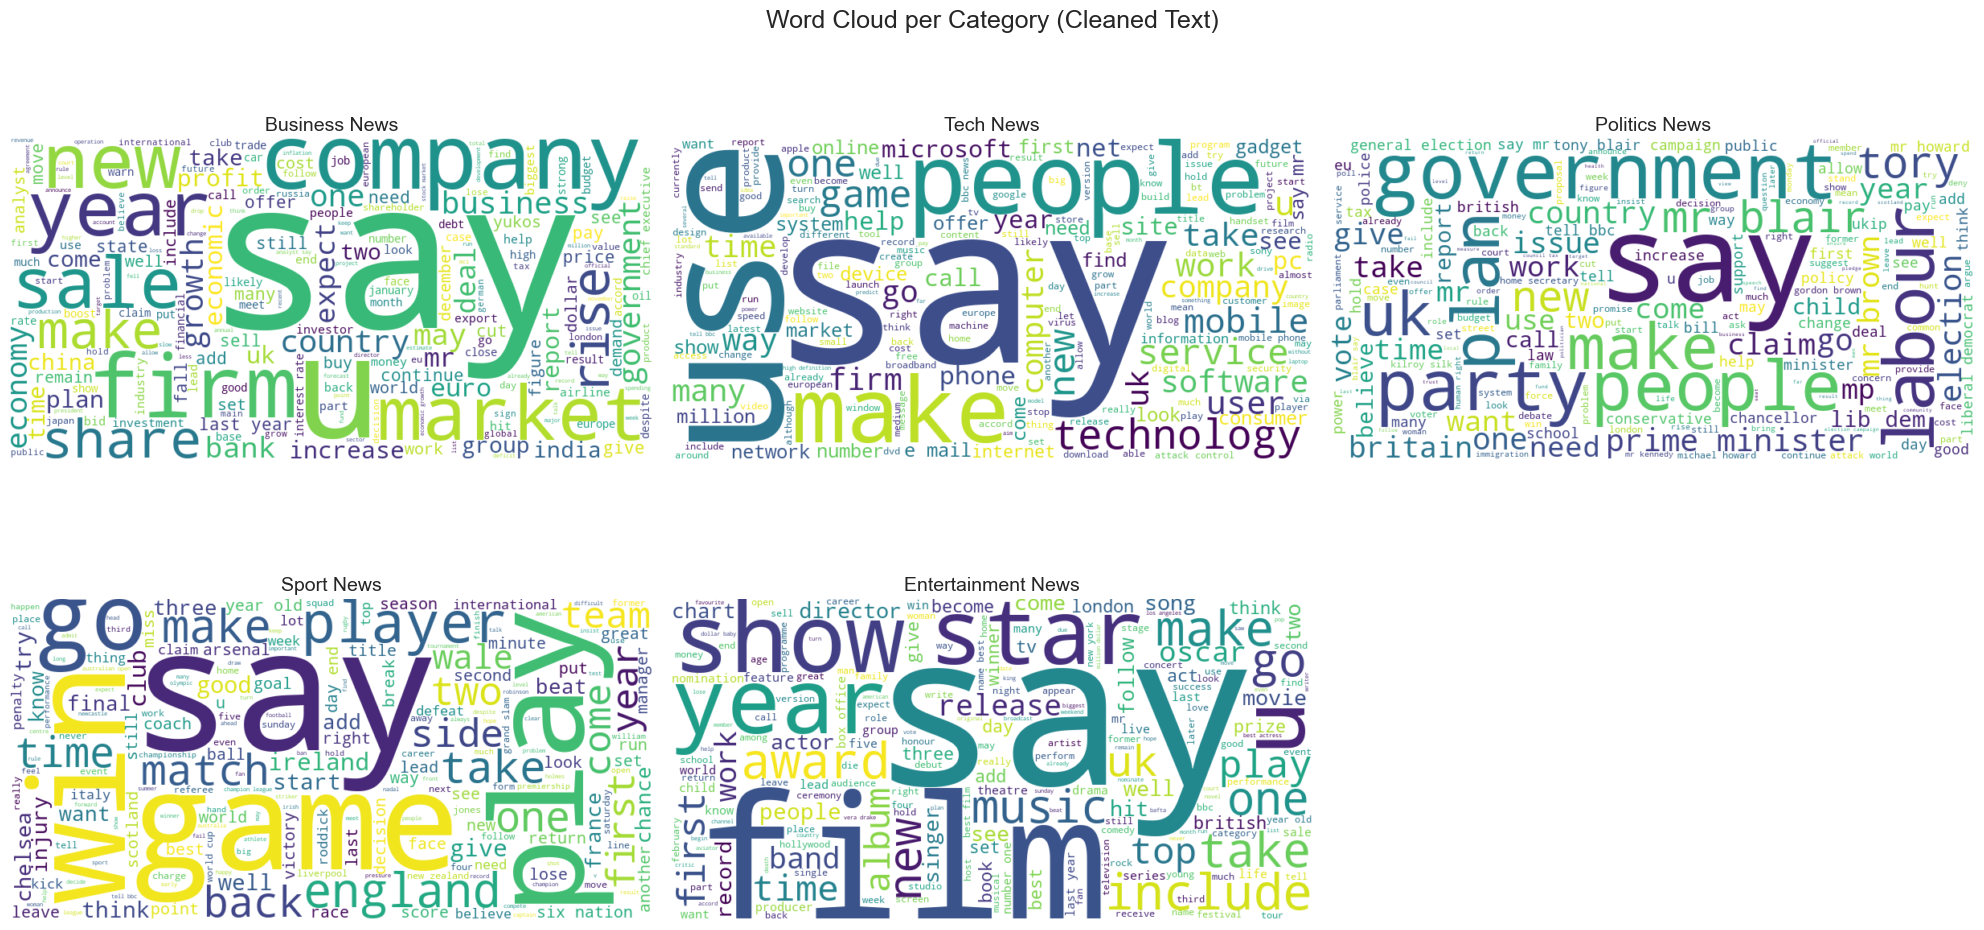

In [73]:
# Categories you want to plot
categories = ['business', 'tech', 'politics', 'sport', 'entertainment']

# Setup figure
plt.figure(figsize=(20, 10))

for i, category in enumerate(categories):
    # Combine all text in this category
    text = " ".join(train_df[train_df['Category'] == category]['Clean_text'].astype(str))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    # Plot
    plt.subplot(2, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{category.capitalize()} News", fontsize=14)

plt.tight_layout()
plt.suptitle("Word Cloud per Category (Cleaned Text)", fontsize=18, y=1.02)
plt.show()


### Simplified Top 100 Word Count

In [74]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in train_df[train_df['Category']==word]['Clean_text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

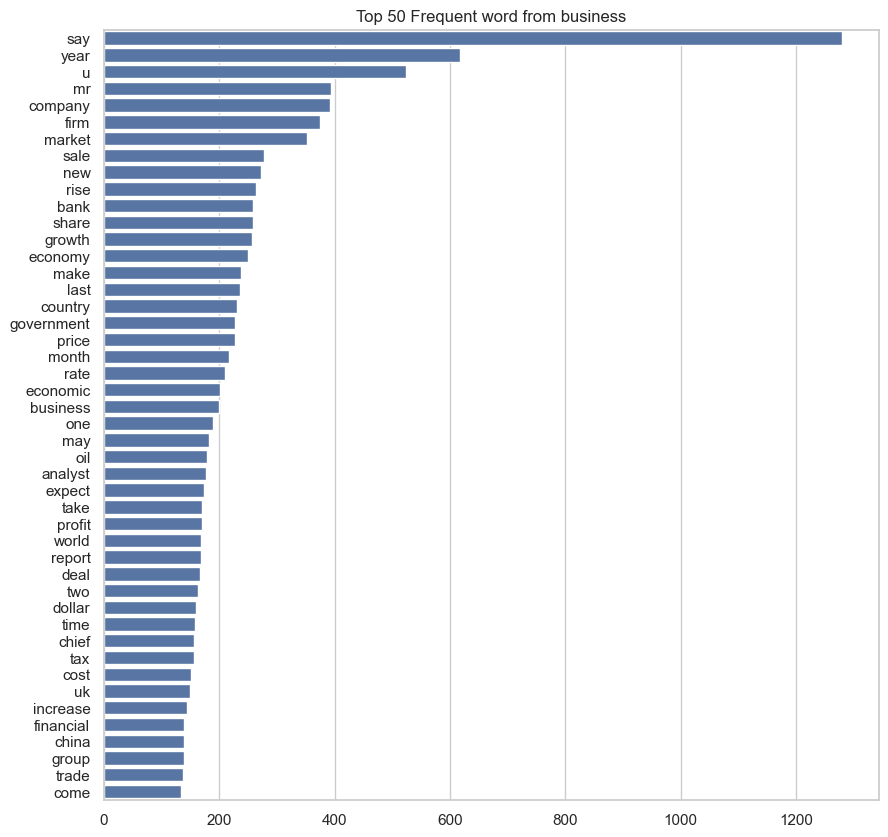

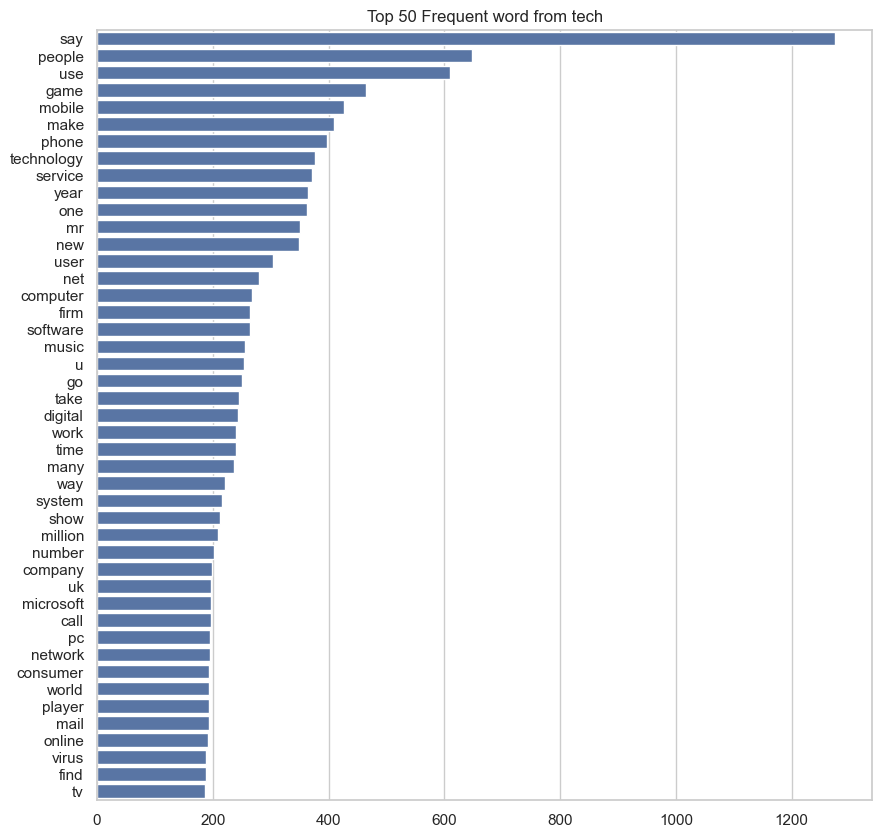

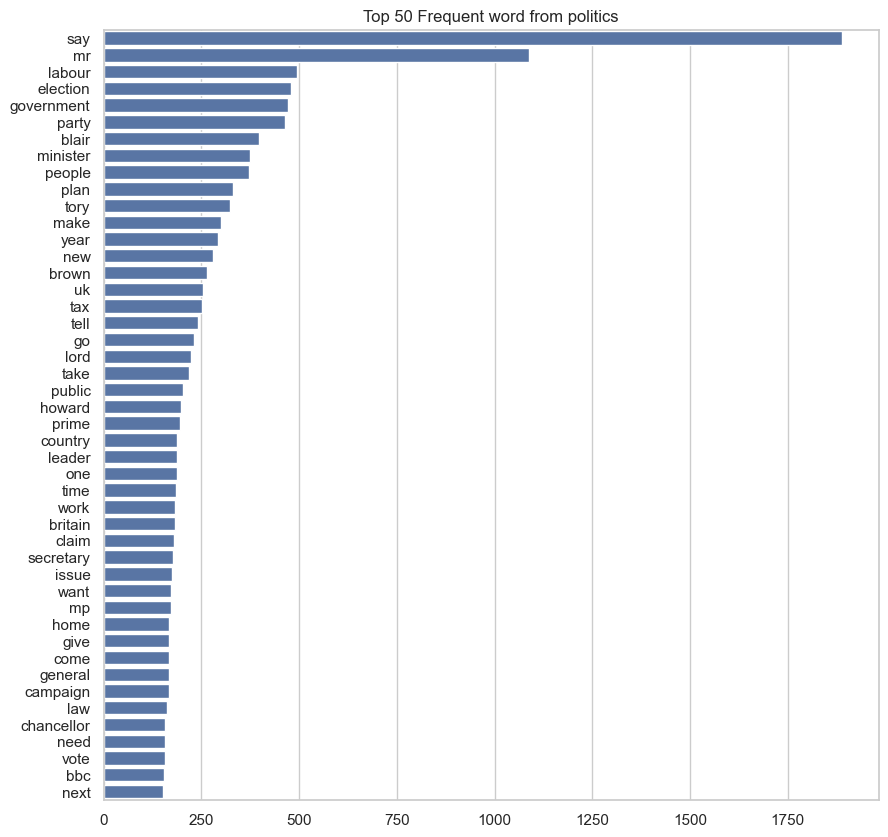

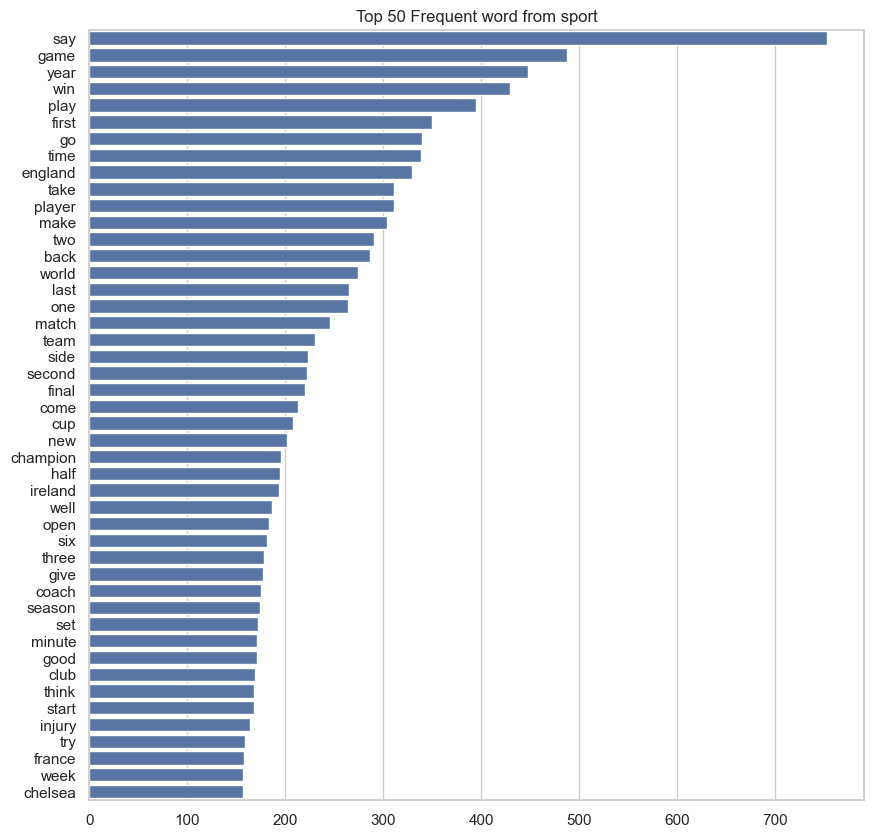

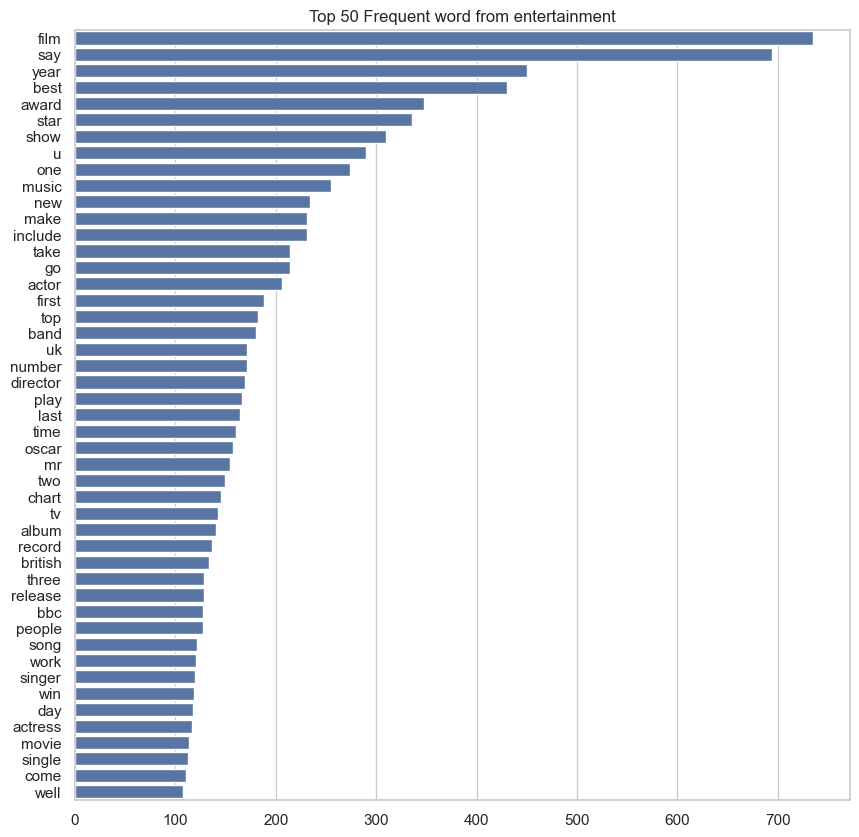

In [77]:
for category in train_df["Category"].unique():
    corpus=create_corpus(category)
    counter=Counter(corpus)
    most=counter.most_common()
    x=[]
    y=[]
    top_n_words = 50
    for word,count in most[:top_n_words]:
        if (word not in stops) :
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10, 10))
    plt.title(f"Top {top_n_words} Frequent word from {category}")
    sns.barplot(x=y,y=x)
    plt.show();

## Inference From Analysis -I

The following can be inferred from the data:

- Number of tokens reduced to half

- ~96% of stopword is been removed


## Statistical Analysis-II

In this context , we will be exploring further into the analysis part. This would allow us to have a better idea which part of the data requires removal and which part can be transformed before applying any model on it.

Here we will be looking into:

- [Gram Statistics](https://albertauyeung.github.io/2018/06/03/generating-ngrams.html)

Gram analysis is an essential tool which forms the base of preparing a common bag of words model containing relevant data. This process implies that we are taking into consideration which words are present in conjunction with other words with a maximum frequency in the dataset. Grams can be n-ary implying that we can have many gram analysis taking n-words together.For example: a Ternary Gram Analysis(Tri-gram) includes analysing sentences which have 3 words occuring together at a higher frequency.

A detailed image of a ternary gram analysis using a famous example is provided:

<img src="https://miro.medium.com/max/536/1*vZhxrBkCz-yN_rzZBqSKiA.png">

Another example is also provided:


<img src="https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png">



In [83]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))

def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["N_gram_words"].values[::-1],
        x=df["N_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['N_gram_words','N_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace
    
def plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
):
    fig = tools.make_subplots(rows=1, cols=5, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of Business", 
                                          "Frequent words of Tech",
                                          "Frequent words of Politics",
                                          "Frequent words of Sports",
                                          "Frequent words of Entertainment"
                                          ])
    
    fig.append_trace(freq_train_df_business, 1, 1)
    fig.append_trace(freq_train_df_tech, 1, 2)
    fig.append_trace(freq_train_df_politics, 1, 3)
    fig.append_trace(freq_train_df_sport, 1, 4)
    fig.append_trace(freq_train_df_entertainment, 1, 5)

    fig['layout'].update(height=1200, width=2000, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')

In [84]:
train_df["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [92]:
# isolate data
train_df_business=train_df[train_df['Category']=="business"]["Clean_text"]
train_df_tech=train_df[train_df['Category']=="tech"]["Clean_text"]
train_df_politics=train_df[train_df['Category']=="politics"]["Clean_text"]
train_df_sport=train_df[train_df['Category']=="sport"]["Clean_text"]
train_df_entertainment=train_df[train_df['Category']=="entertainment"]["Clean_text"]

### Bi-gram Frequency Plots

In [93]:
freq_train_df_business=create_new_df(create_dict(train_df_business[:200],2))
freq_train_df_tech=create_new_df(create_dict(train_df_tech[:200],2))
freq_train_df_politics=create_new_df(create_dict(train_df_politics[:200],2))
freq_train_df_sport=create_new_df(create_dict(train_df_sport[:200],2))
freq_train_df_entertainment=create_new_df(create_dict(train_df_entertainment[:200],2))

In [94]:
print("Bi-gram analysis")

plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
)

Bi-gram analysis


### Tri-gram Frequency Plots

In [95]:
freq_train_df_business=create_new_df(create_dict(train_df_business[:200],3))
freq_train_df_tech=create_new_df(create_dict(train_df_tech[:200],3))
freq_train_df_politics=create_new_df(create_dict(train_df_politics[:200],3))
freq_train_df_sport=create_new_df(create_dict(train_df_sport[:200],3))
freq_train_df_entertainment=create_new_df(create_dict(train_df_entertainment[:200],3))

In [96]:
print("Tri-gram analysis")

plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
)

Tri-gram analysis


### Penta-gram Frequency Plots

In [97]:
freq_train_df_business=create_new_df(create_dict(train_df_business[:200],5))
freq_train_df_tech=create_new_df(create_dict(train_df_tech[:200],5))
freq_train_df_politics=create_new_df(create_dict(train_df_politics[:200],5))
freq_train_df_sport=create_new_df(create_dict(train_df_sport[:200],5))
freq_train_df_entertainment=create_new_df(create_dict(train_df_entertainment[:200],5))

In [98]:
print("Penta-gram analysis")

plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
)

Penta-gram analysis


## Inference from Analysis - II

In this section, we have analysed based on positional features of words in a corpus/sentence/paragraph. The Gram analysis,particularly the pentagram analysis provides an idea which sentences occur more often in the corpus. And in most of the cases, these bag of words are the ones picked up by any frequency vectorization technique. 

Thus this provides an outline as to the frequency of the conjuction of words which are occuring at the highest frequency. Another important aspect is that,there is a presence of certain punctuations which have to be removed as these are adding noise to the review corpus. This will be taken up in the cleaning phase.

## Vocabulary richness


In [ ]:
# check for vocabulary richness

# Function to compute richness metrics for a group of documents
def compute_vocab_richness(texts):
    tokens = ' '.join(texts).split()
    total_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    ttr = unique_tokens / total_tokens if total_tokens > 0 else 0
    return pd.Series({
        'Total Tokens': total_tokens,
        'Unique Tokens': unique_tokens,
        'TTR': round(ttr, 4)
    })

# Apply per category
vocab_richness = train_df.groupby('Category')['Clean_text'].apply(compute_vocab_richness).reset_index()
vocab_richness

,Category,level_1,Clean_text
0,business,Total Tokens,64272.0000
1,business,Unique Tokens,7214.0000
2,business,TTR,0.1122
3,entertainment,Total Tokens,51993.0000
4,entertainment,Unique Tokens,7770.0000
5,entertainment,TTR,0.1494
6,politics,Total Tokens,68034.0000
7,politics,Unique Tokens,6904.0000
8,politics,TTR,0.1015
9,sport,Total Tokens,63075.0000


1. Vocabulary Richness (TTR):

    - Highest: entertainment (0.1494) → most diverse vocabulary

    - Lowest: tech (0.0997) → most repetitive vocabulary

2. Token Volume:

    - Most tokens: tech (74,005) → possibly longer or more content-heavy documents

    - Fewest tokens: entertainment (51,993)

3. Unique Tokens:

    - entertainment has the highest unique vocabulary (7,770) despite fewer total tokens than tech

    - This leads to its higher TTR

In [102]:
def calculate_ttr_by_category(df, text_column='Clean_text', category_column='Category'):
    """
    Calculate total tokens, unique tokens, and type-token ratio (TTR)
    for each category in the given DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame with at least two columns: category and clean text.
        text_column (str): Name of the column containing cleaned text.
        category_column (str): Name of the column containing category labels.
    
    Returns:
        pd.DataFrame: DataFrame with category, total tokens, unique tokens, and TTR.
    """
    results = []

    for category, group in df.groupby(category_column):
        texts = group[text_column].astype(str)
        all_tokens = ' '.join(texts).split()
        total_tokens = len(all_tokens)
        unique_tokens = len(set(all_tokens))
        ttr = unique_tokens / total_tokens if total_tokens > 0 else 0
        
        results.append({
            'Category': category,
            'Total Tokens': total_tokens,
            'Unique Tokens': unique_tokens,
            'TTR': round(ttr, 4)
        })

    return pd.DataFrame(results)


# Apply per category
vocab_richness = calculate_ttr_by_category(train_df)
vocab_richness

,Category,Total Tokens,Unique Tokens,TTR
0,business,64272,7214,0.1122
1,entertainment,51993,7770,0.1494
2,politics,68034,6904,0.1015
3,sport,63075,7080,0.1122
4,tech,74005,7378,0.0997


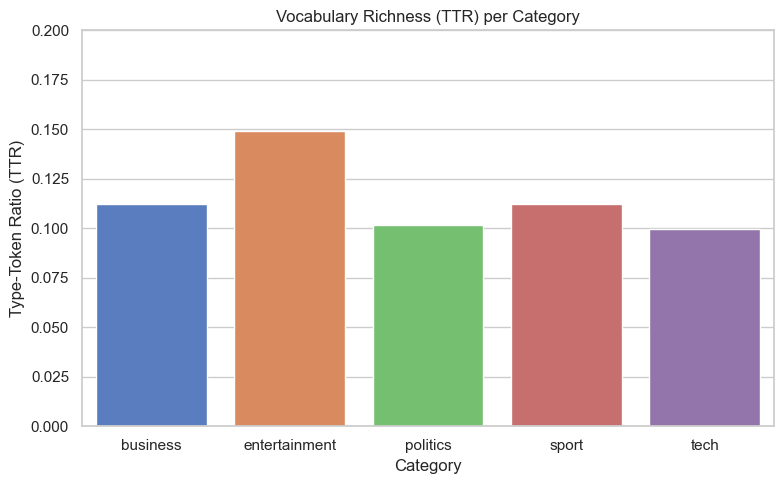

In [104]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=vocab_richness, x='Category', y='TTR', palette='muted')
plt.title('Vocabulary Richness (TTR) per Category')
plt.ylabel('Type-Token Ratio (TTR)')
plt.ylim(0, 0.2)
plt.tight_layout()
plt.show()
